In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set(style="darkgrid")

In [4]:
df = pd.read_csv('cars_us.csv')

In [5]:
pd.set_option('display.max_rows', 70)

In [6]:
#Funcions utilitzades en el codi: 

In [7]:
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.15)
    Q3 = df[columna].quantile(0.95)
    IQR = Q3 - Q1
    return df[(df[columna] >= Q1 - 1.5 * IQR) & (df[columna] <= Q3 + 1.5 * IQR)]

In [8]:
#Numero de cotxes dels que tenim dades.

In [9]:
len(df)

2602

In [10]:
df.dtypes

Unnamed: 0                     int64
Brand                         object
Model.Number                  object
Price                        float64
Photo                         object
                              ...   
Smart.Access.Card.Entry       object
Xenon.Headlamps               object
Halogen.Headlamps             object
Removable.Convertible.Top     object
Cassette.Player               object
Length: 76, dtype: object

In [11]:
#Fem una copia de dataframe per jugar a eliminar columnes i registres

In [12]:
dfAlt = df

In [13]:
#Esborrem les columnes que no interessen.

In [14]:
dfAlt = dfAlt.drop(columns=['Photo','MPG.City','MPG.Highway','Height.in','Length.in','Width.in','Wheelbase.in','Clearance.in','Halogen.Headlamps','Cassette.Player','Vehicle.Stability.Control.System'])

In [15]:
dfAlt.dtypes

Unnamed: 0                             int64
Brand                                 object
Model.Number                          object
Price                                float64
Engine.Type                           object
Body.Type                             object
Fuel.Type                             object
Gearbox.Type                          object
Power.hp                             float64
Displacement.l                       float64
Torque.lbft                          float64
Cylinders                            float64
Drivetrain                            object
Seats                                float64
Doors                                float64
Air.Conditioner                       object
Heater                                object
AntiLock.Braking.System               object
Central.Locking                       object
Power.Steering                        object
Power.Windows                         object
Leather.Seats                         object
Anti.Lock.

In [16]:
#Quina es la distribucio de cotxes atuomatics / manuals ?

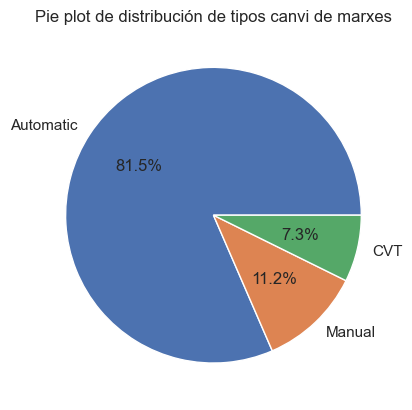

In [17]:
tipus_canvi = dfAlt['Gearbox.Type'].value_counts()

plt.pie(tipus_canvi, labels=tipus_canvi.index, autopct='%1.1f%%')
plt.title('Pie plot de distribución de tipos canvi de marxes')
plt.show()

In [18]:
#Quin tipus de carrosseria es més popular?

C:\Users\Suna\AppData\Local\Temp\ipykernel_11804\2345823383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Body.Type', data=dfAlt, palette='bright')


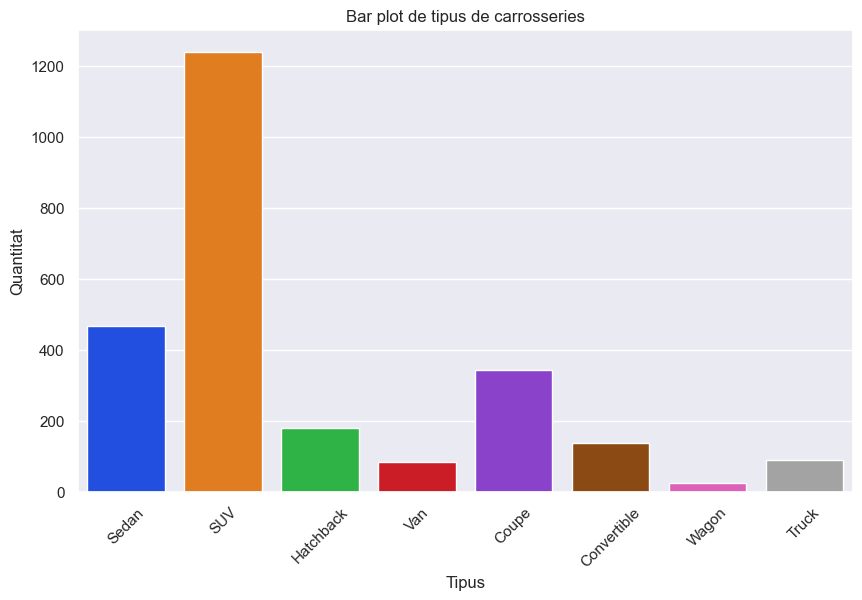

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Body.Type', data=dfAlt, palette='bright')
plt.title('Bar plot de tipus de carrosseries')
plt.xlabel('Tipus')
plt.ylabel('Quantitat')
plt.xticks(rotation=45)  
plt.show()

In [20]:
#Quin tipus de combustible és més comú en aquests cotxes?

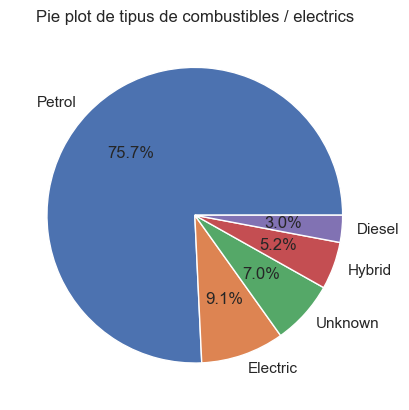

In [21]:
combustibles = dfAlt['Fuel.Type'].value_counts()

plt.pie(combustibles, labels=combustibles.index, autopct='%1.1f%%')
plt.title('Pie plot de tipus de combustibles / electrics')
plt.show()

In [22]:
#Quina es la distribució de Cavalls de potencia entre aquests vehicles (en rangs de 100)? 

In [23]:
#Filtrant resultats atípics

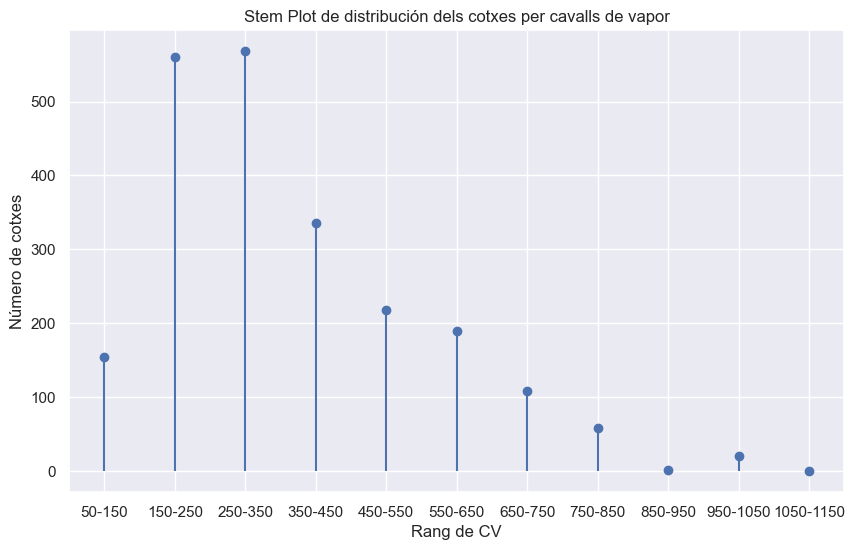

In [24]:
POWER = dfAlt['Power.hp']
bins = range(50, 1200, 100)  
labels = [f"{i}-{i+100}" for i in bins[:-1]]
POWER_GROUPED = pd.cut(POWER, bins=bins, labels=labels, right=False)
POWER_COUNTS = POWER_GROUPED.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.stem(POWER_COUNTS.index, POWER_COUNTS.values, linefmt='C0-', markerfmt='o', basefmt=' ')
plt.xlabel('Rang de CV')
plt.ylabel('Número de cotxes')
plt.title('Stem Plot de distribución dels cotxes per CV')
plt.grid(True)
plt.show()

In [25]:
#Quina es la cilindrada d'aquests cotxes?

C:\Users\Suna\AppData\Local\Temp\ipykernel_11804\4182637725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cylinders', data=Filtre, palette='dark')


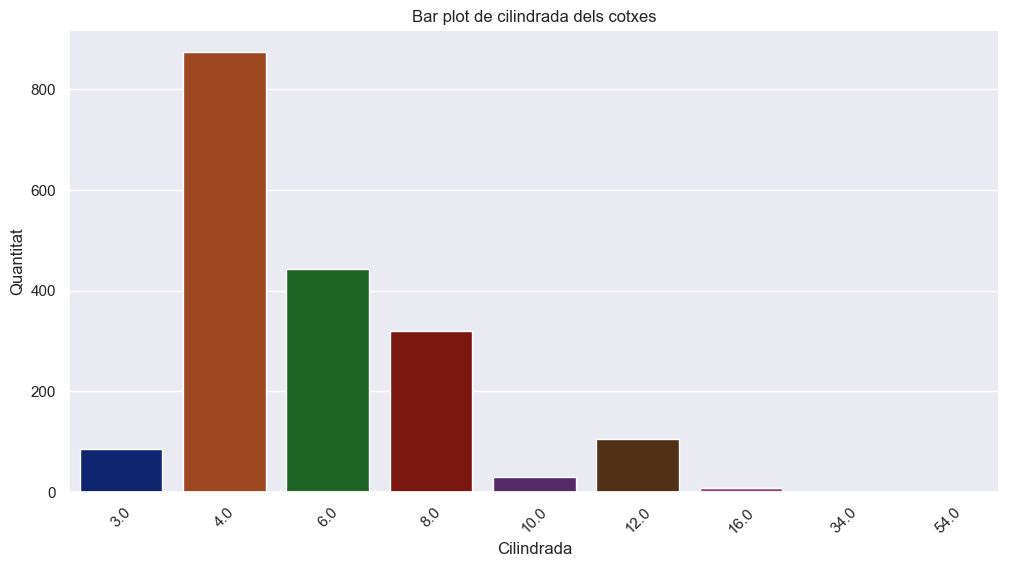

In [26]:
plt.figure(figsize=(12,6))

Filtre = dfAlt.dropna(subset=['Cylinders'])

Filtre = Filtre[Filtre['Cylinders'].isin(Filtre['Cylinders'].value_counts().index)]
sns.countplot(x='Cylinders', data=Filtre, palette='dark')
plt.title('Bar plot de cilindrada dels cotxes')
plt.xlabel('Cilindrada')
plt.ylabel('Quantitat')
plt.xticks(rotation=45)
plt.show()


In [27]:
#Quin tipus de tracció utilitzen aquests cotxes?

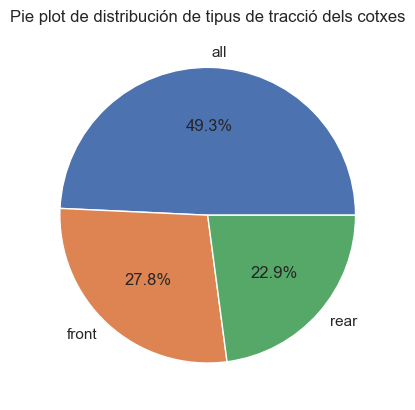

In [28]:
tipus_traccio = dfAlt['Drivetrain'].value_counts()

plt.pie(tipus_traccio, labels=tipus_traccio.index, autopct='%1.1f%%')
plt.title('Pie plot de distribución de tipus de tracció dels cotxes')
plt.show()

In [29]:
#Quina es la distribució de Cavalls de vapor / cilindrada?

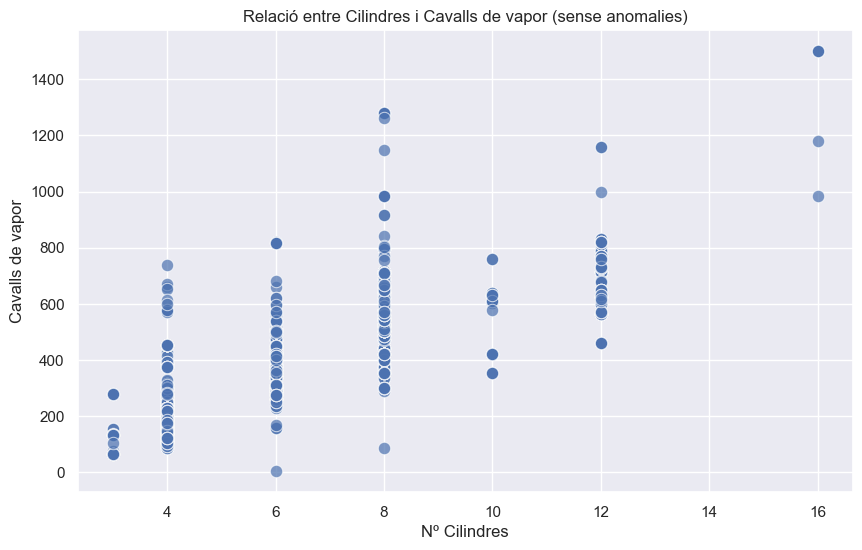

In [30]:
dfAlt['Power.hp'] = pd.to_numeric(dfAlt['Power.hp'], errors='coerce')
dfAlt['Cylinders'] = pd.to_numeric(dfAlt['Cylinders'], errors='coerce')

df_clean = dfAlt.dropna(subset=['Power.hp', 'Cylinders'])

df_filtre = eliminar_outliers(df_clean, 'Power.hp')
df_filtre = eliminar_outliers(df_filtre, 'Cylinders')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cylinders', y='Power.hp', data=df_filtre, alpha=0.7, s=80)
plt.title('Relació entre Cilindres i Cavalls de vapor (sense anomalies)')
plt.xlabel('Nº Cilindres')
plt.ylabel('Cavalls de vapor')
plt.grid(True)
plt.show()


In [31]:
#Quina es la relacio preu / CV ? 

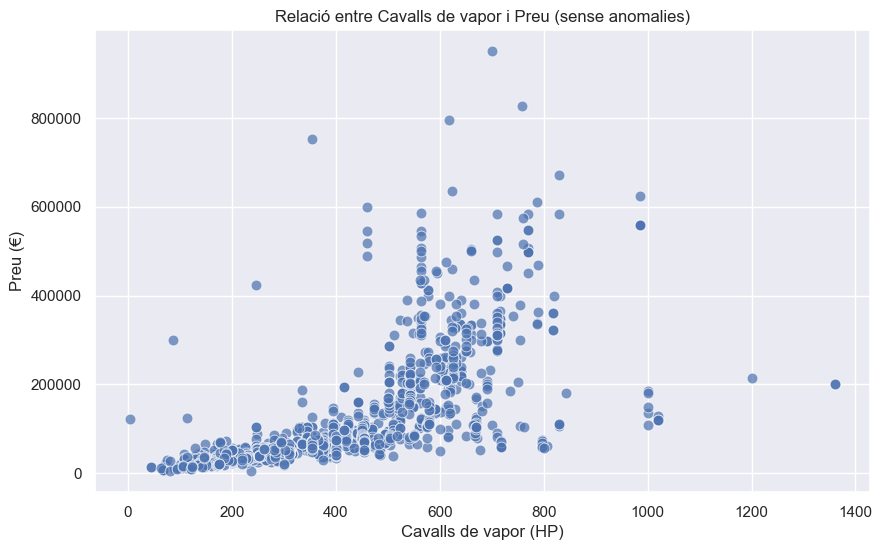

In [32]:

dfAlt['Power.hp'] = pd.to_numeric(dfAlt['Power.hp'], errors='coerce')
dfAlt['price'] = pd.to_numeric(dfAlt['Price'], errors='coerce')

df_clean = dfAlt.dropna(subset=['Power.hp', 'Price'])

df_filtrado = eliminar_outliers(df_clean, 'Power.hp')
df_filtrado = eliminar_outliers(df_filtrado, 'Price')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Power.hp',
    y='Price',
    data=df_filtrado,
    alpha=0.7,
    s=60
)
plt.title('Relació entre Cavalls de vapor i Preu (sense anomalies)')
plt.xlabel('Cavalls de vapor (HP)')
plt.ylabel('Preu (€)')
plt.grid(True)
plt.show()


In [33]:
#Quina es la relacio entre Capacitat del motor i cavalls de vapor? 

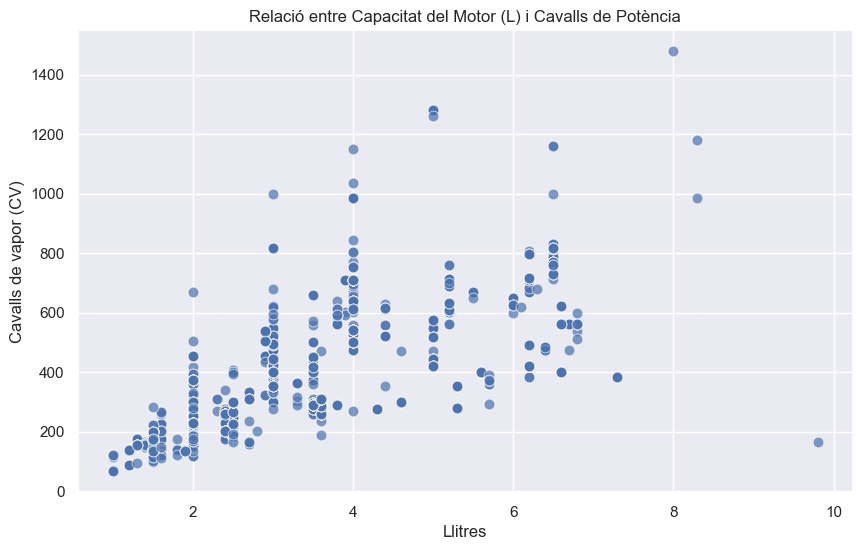

In [34]:
dfAlt['Displacement.l'] = pd.to_numeric(dfAlt['Displacement.l'], errors='coerce')
dfAlt['Power.hp'] = pd.to_numeric(dfAlt['Power.hp'], errors='coerce')

df_clean = dfAlt.dropna(subset=['Displacement.l', 'Power.hp'])

df_filtrado = eliminar_outliers(df_clean, 'Displacement.l')
df_filtrado = eliminar_outliers(df_filtrado, 'Power.hp')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Displacement.l',
    y='Power.hp',
    data=df_filtrado,
    alpha=0.7,
    s=60
)
plt.title('Relació entre Capacitat del Motor (L) i Cavalls de Potència')
plt.xlabel('Llitres')
plt.ylabel('Cavalls de vapor (CV)')
plt.grid(True)
plt.show()


In [35]:
#Ara bé, quin es el cotxe/s definitius per gaudir d'una conducció esportiva?

In [36]:
dfAlt['Power.hp'] = pd.to_numeric(dfAlt['Power.hp'], errors='coerce')

for col in ['Brand', 'Body.Type', 'Fuel.Type', 'Gearbox.Type', 'Drivetrain', 'Air.Conditioner', 'Leather.Seats']:
    dfAlt[col] = dfAlt[col].str.strip().str.title()

marcas = ['Bmw', 'Honda', 'Lexus', 'Hyundai', 'Toyota', 'Nissan', 'Audi', 
          'Chevrolet', 'Mercedes', 'Porsche', 'Infiniti', 'Jaguar', 'Cadillac', 
          'Maserati', 'Subaru', 'Bugatti', 'Mazda', 'Aston Martin', 'Ferrari', 
          'Lamborghini', 'Bentley', 'Rolls Royce', 'Mclaren']


df_filtrado = dfAlt[
    (dfAlt['Brand'].isin(marcas)) &  
    (dfAlt['Body.Type'].isin(['Coupe', 'Convertible'])) &
    (dfAlt['Fuel.Type'] == 'Petrol') &
    (dfAlt['Gearbox.Type'] == 'Manual') &
    (dfAlt['Power.hp'] > 300) &
    (dfAlt['Drivetrain'] == 'Rear') &
    (dfAlt['Air.Conditioner'] == 'Yes') &
    (dfAlt['Leather.Seats'] == 'Yes')
]

df_resultado = df_filtrado[['Brand', 'Model.Number', 'Body.Type', 'Power.hp', 'Fuel.Type', 
                            'Gearbox.Type', 'Drivetrain', 'Air.Conditioner', 'Leather.Seats']]

print(df_resultado)


      Brand        Model.Number Body.Type  Power.hp Fuel.Type Gearbox.Type  \
92      Bmw             M2 2023     Coupe     453.0    Petrol       Manual   
384  Nissan        Z Proto 2023     Coupe     400.0    Petrol       Manual   
414  Nissan  Z Performance 2023     Coupe     400.0    Petrol       Manual   
415  Nissan        Z Proto 2023     Coupe     400.0    Petrol       Manual   

    Drivetrain Air.Conditioner Leather.Seats  
92        Rear             Yes           Yes  
384       Rear             Yes           Yes  
414       Rear             Yes           Yes  
415       Rear             Yes           Yes  
